##  Data Science and Business Analytics
###  TASK 1: Predict the percentage of a student based on the number of study hours
###  Prediction using Supervised ML
### **Name : Neha C Naik**

In [2]:
# Importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [3]:
# reading data from the given url (remote link) using pandas

url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)

print("Successfully imported the data!")
student_data

Successfully imported the data!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# describe - view basic statistical data

student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


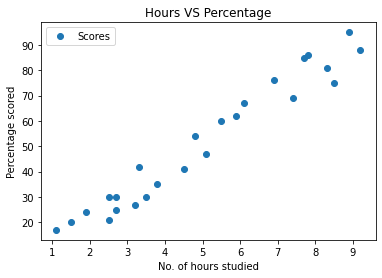

In [6]:
#Visualizing and Analizing the dataset:
#plotting the graph - scores vs no. of hours studied

student_data.plot(x="Hours", y="Scores", style="o")
plt.title("Hours VS Percentage")
plt.xlabel("No. of hours studied")
plt.ylabel("Percentage scored")
plt.show()

#### The above graph shows the direct relation between hours and score i.e. percentage is increasing along with no. of hours.
#### It is a positive linear graph.

### **Preparing the data**

In [7]:
#separating the data into X (no. of hours) and Y (score)
x = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values  

In [19]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [20]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [8]:
#split data as into train/test datasets using Scikit-learn's built-in function

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [15]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [16]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [17]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [18]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

### **Training the Algorithm**

In [9]:
#design & train the model // Linear Regression

from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print("Training complete.")

Training complete.


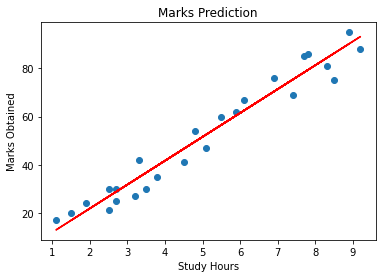

In [10]:
#Plotting regression line

line=regressor.coef_*x+regressor.intercept_    #y=mx+c
#for test data
plt.scatter(x,y)
plt.plot(x,line,color="red")
plt.title('Marks Prediction')
plt.xlabel('Study Hours')
plt.ylabel('Marks Obtained')
plt.show()

### **Making Predictions**

In [11]:
#predictions using testing data

print(x_test) # in Hours
y_pred = regressor.predict(x_test) #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
#predicting score if a student studies for 9.25 hrs/ day
hours = 9.25
pred_score = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred_score[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


Therfore, the predicted score if a student studies for 9.25 hrs/day is about **93.69**.



### **Evaluating the model**

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
#Max Error
print('Max Error:', metrics.max_error(y_test, y_pred))
#Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Max Error: 6.732260779489849
Mean Squared Error: 21.598769307217406
